<a href="https://colab.research.google.com/github/jhermosillo/diplomado_CDD2019/blob/master/An%C3%A1lisis%20Estad%C3%ADstico/Decision_estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución t

La distribución t  de Student es una distribución continua de probabilidad que surge cuando la media de una población normalmente distribuida en situaciones donde el tamaño de la muestra es pequeño (<30) y la deviación estándar poblacional es desconocida. Su función de densidad de probabilidad (PDF) está dada por

$$ f(x)=\frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})}\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}} $$

donde $0<\nu\in\mathbb{R}$ son los grados de libertad. Posee 


*   media 0 para $\nu>0$ e indefinida en otro caso.
*   mediana 0.
*   varianza $\frac{\nu}{\nu-2}$ para $\nu>2$, $\infty$ para $1<\nu\leq 2$, e indefinida en otro caso.



In [0]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t

In [0]:
df = 3.0
mean, var = t.stats(df, moments='mv') # Obtener la media y la varianza para una t con 2 grados de libertad

In [47]:
print(df,mean,var) #valores teóricos

3.0 0.0 3.0


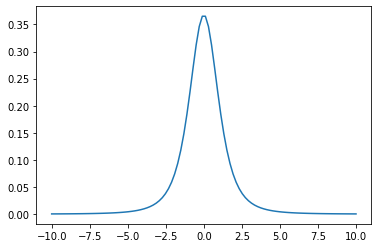

In [49]:
rv = t(df, loc=0, scale=1) #Se crea una distribución t con 20 grados de libertad 
x = np.linspace(-10, 10, 100) # 100 núúmeros equiespaciados entre -10 y 10
y = rv.pdf(x)  # Los valores de la función de densidad de probabilidad de la distribución t en cada valor de x
plt.plot(x,y)

(array([  1.,   0.,   3.,  12.,  41., 409., 472.,  53.,   5.,   4.]),
 array([-12.51648163, -10.44222077,  -8.3679599 ,  -6.29369904,
         -4.21943817,  -2.14517731,  -0.07091644,   2.00334442,
          4.07760529,   6.15186615,   8.22612702]),
 <a list of 10 Patch objects>)

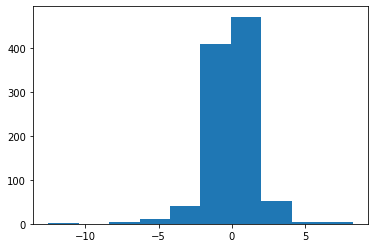

In [50]:
r = t.rvs(df, size=1000) # se obtienen 1000 números aleatorios con distribución t
plt.hist(r) #veamos el histograma

In [51]:
np.mean(r),np.var(r) #estimación basada en una muestra de tamaño 1000

(-0.02171836673731474, 2.3252220729616933)

(array([1.000e+00, 3.000e+00, 4.000e+00, 1.900e+01, 1.680e+02, 8.416e+03,
        1.340e+03, 4.100e+01, 4.000e+00, 4.000e+00]),
 array([-28.15427822, -23.24297768, -18.33167714, -13.4203766 ,
         -8.50907605,  -3.59777551,   1.31352503,   6.22482557,
         11.13612612,  16.04742666,  20.9587272 ]),
 <a list of 10 Patch objects>)

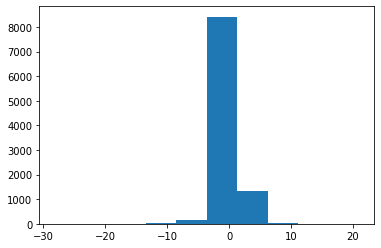

In [52]:
r2 = t.rvs(df, size=10000) # se obtienen 10000 números aleatorios con distribución t
plt.hist(r2) #veamos el histograma

In [53]:
np.mean(r2),np.var(r2) #estimación con una muestra de tamaño 10,000

(-0.009387591667404998, 3.129771115494011)

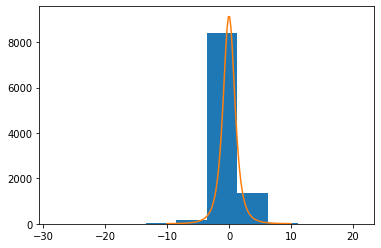

In [54]:
#Comparación entre el histograma y la curva de la función densidad de probabilidad
plt.hist(r2)
plt.plot(x,25000*y) #Se reescala el valor de la probabilidad para poder comparar

La base de la prueba de hipótesis tiene dos elementos: 


1.   Hipótesis nula $H_0$; e
2.   hipótesis aleternativa $H_1$.

La **hipótesis nula**:

1.  Propone que no existe diferencia significativa en un conjunto de observaciones dadas.

2.  Es una afirmación general o posición por defecto que consiste en que nada significativo tiene lugar. 

La **hiótesis alternativa** es cualquier hipótesis que difiere de la hipótesis nula. 

Ejemplo:

$H_0$: Dadas dos muestras, sus medias son iguales.

$H_1$: Dadas dos muestras, sus medias son diferentes.

Para rechazar una hipótesis nula se calcula una prueba estadística. 

La ecuación es:
$$\frac{Mejor\ Estimación - Estimación\ hipotetizada}{Estimación\ de\ Error\ Estámdar}$$


Un valor p para un modelo estadístico es la probabilidad de que cuando la hipótesis nula es verdad, los resultados estadísticos sean mayores o iguales que los resultados observados. 



# La prueba t

Una prueba t es un tipo de estadística inferencial usada para determinar si hay una diferencia significativa entre las media de dos conjuntos de datos, los cuales podrían estar relacionados en ciertas características.

Una prueba t se usa como una herramienta de prueba hipótesis.

Escencialmente una prueba t nos permite comparar los valores promedio de dos conjuntos de datos y determinar si provienen de la misma población. 

## Diferencia entre propociones poblacionales

### Pregunta de investigación

¿Hay una diferencia significativa entre las proporciones poblacionales de padres de niños afrodecendientes y padres de hijos hispanos que indican que sus hijos han tomado clases de natación?

**Poblaciones**: Todos los padres de niños afrodecendientes con edades entre 6 y 18 años y todos los padres de hijos hispanos con edades entre 6 y 18 años.

**Parámetro de interés**: p1 - p2, donde p1 = afrodecendiente y p2 = hispano

**Hipótesis nula:** p1 - p2 = 0  
**Hipótesis alternativa:** p1 - p2 $\neq$ = 0  

**Datos**: 247 padres de niños afrodecendientes. 36.8% de padres indican que sus hijos han tomado clases de natación
. 
<br>308 padres de niños hispanos. 38.9% de padres indican que sus hijos han tomado clases de natación.

### Uso de `ttest_ind()` del paquete `statsmodels`

La diferencia en la proporción de poblaciones requiere la prueba t. Además, esta población sigue una distribución binomial. Entonces se puede simplemente pasar las dos cantidades poblacionales con los valores apropiados de la distribución binomial a la función t-test.

La función regresa tres valores: (a) la prueba estadística, (b) valor p de la prueba t, (c) los grados de libertad usados en la prueba t.

In [0]:
n1 = 247
p1 = .37

n2 = 308
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [59]:
sm.stats.ttest_ind(population1, population2)

(-0.5921544499760306, 0.5539891911327439, 553.0)

### Conclusión de la prueba de hipótesis
Dado que el valor p es alto (> 0.5), no podemos rechazar la hipótesis nula en este caso. Esto es, la diferencia entre las proporciones de la población no es estadísticamente significativa.

### ¿Qué sucedería si pudieramos encuestar a muchos más individuos?

No cambiamos las proporciones, solo el número de participantes en las dos poblaciones. La pequeña diferencia en la proporción podría volverse estadísticamente significativa en esta situación. No hay ninguna garantía de que siempre se ejecute el siguiente código se obtenga un valor p < 0.05 ya que las muestras son generadas aleatoriamente cada vez.

In [0]:
n1 = 5000
p1 = .37

n2 = 5000
p2 = .39

population1 = np.random.binomial(1, p1, n1)
population2 = np.random.binomial(1, p2, n2)

In [62]:
sm.stats.ttest_ind(population1, population2)

(-2.9969533829934507, 0.0027336195160822005, 9998.0)

## Media de una población 

### Pregunta

Vamos a suponer que se realiza una competencia de carros caseros sin motor para adultos. Los datos son:

(80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01)

¿La distancia media (en pulgadas) es más que 80 pulgadas?

**Población**: Todos adultos  
**Parámetro de interés**: $\mu$, media poblacional de la distancia.

**Hipótesis nula:** $\mu$ = 80 
<br>**Hipótesis alternativa**: $\mu$ > 80

**Datos**:
<br>25 adultos participantes.
<br>$\mu = 83.84$
<br>$\sigma = 10.72$

In [0]:
cwdata = np.array([80.57, 98.96, 85.28, 83.83, 69.94, 89.59, 91.09, 66.25, 91.21, 82.7 , 73.54, 81.99, 54.01, 
                 82.89, 75.88, 98.32, 107.2 , 85.53, 79.08, 84.3 , 89.32, 86.35, 78.98, 92.26, 87.01])

In [0]:
n = len(cwdata)
mean = cwdata.mean()
sd = cwdata.std()
(n, mean, sd)

(25, 83.84320000000001, 10.716018932420752)

In [0]:
sm.stats.ztest(cwdata, value = 80, alternative = "larger")

(1.756973189172546, 0.039461189601168366)

### Conclusión 
Dado que p es pequeña, se puede rechazar la hipótesis nula. Así hay una fuerte evidencia de que la distancia media es mayor a 80 pulgadas.

Se muestra el histograma para ver si los datos siguen aproximadamente una distribución normal.


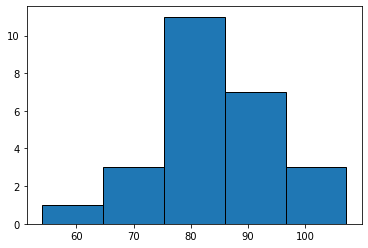

In [0]:
plt.hist(cwdata,bins=5,edgecolor='k')
plt.show()

## Diferencia en las medias de poblaciones

### Pregunta

Considerando adultos en la [datos NHANES](https://www.cdc.gov/nchs/nhanes/index.htm), ¿los hombres tienen significativamente mayor media de BMI [Body Mass Index](https://www.cdc.gov/healthyweight/assessing/bmi/index.html) que las mujeres?



**Datos:**

2976 Females 
$\mu_1 = 29.94$  
$\sigma_1 = 7.75$  

2759 Male Adults  
$\mu_2 = 28.78$  
$\sigma_2 = 6.25$  

$\mu_1 - \mu_2 = 1.16$

In [0]:
url = "https://raw.githubusercontent.com/kshedden/statswpy/master/NHANES/merged/nhanes_2015_2016.csv"
da = pd.read_csv(url)
da.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [0]:
females = da[da["RIAGENDR"] == 2]
male = da[da["RIAGENDR"] == 1]

In [0]:
n1 = len(females)
mu1 = females["BMXBMI"].mean()
sd1 = females["BMXBMI"].std()

(n1, mu1, sd1)

(2976, 29.93994565217392, 7.753318809545674)

In [0]:
n2 = len(male)
mu2 = male["BMXBMI"].mean()
sd2 = male["BMXBMI"].std()

(n2, mu2, sd2)

(2759, 28.778072111846942, 6.2525676168014614)

In [0]:
sm.stats.ztest(females["BMXBMI"].dropna(), male["BMXBMI"].dropna(),alternative='two-sided')

(6.1755933531383205, 6.591544431126401e-10)

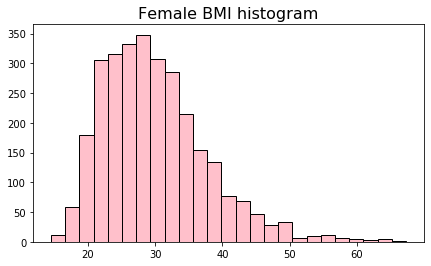

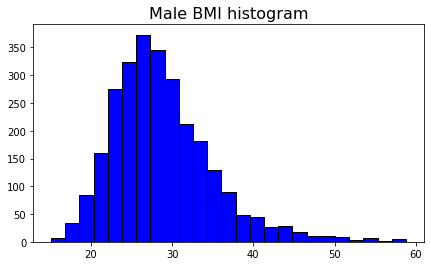

In [0]:
plt.figure(figsize=(7,4))
plt.title("Female BMI histogram",fontsize=16)
plt.hist(females["BMXBMI"].dropna(),edgecolor='k',color='pink',bins=25)
plt.show()

plt.figure(figsize=(7,4))
plt.title("Male BMI histogram",fontsize=16)
plt.hist(male["BMXBMI"].dropna(),edgecolor='k',color='blue',bins=25)
plt.show()